In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import dtale

In [2]:
# read the dataset 

df = pd.read_csv('../artifacts/data_ingestion/clothesDataset.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# check any null values 

df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
# check any duplicates 

df.duplicated().sum()

0

In [6]:
# dataset information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# describe 

df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
# auto eda 

report = dtale.show(df)  

In [9]:
report.open_browser()

In [10]:
print(f"D-Tale Report URL: {report._main_url}")

D-Tale Report URL: http://DESKTOP-6P2M2Q2:40000/dtale/main/1


Text(0.5, 1.0, 'Outliers columns')

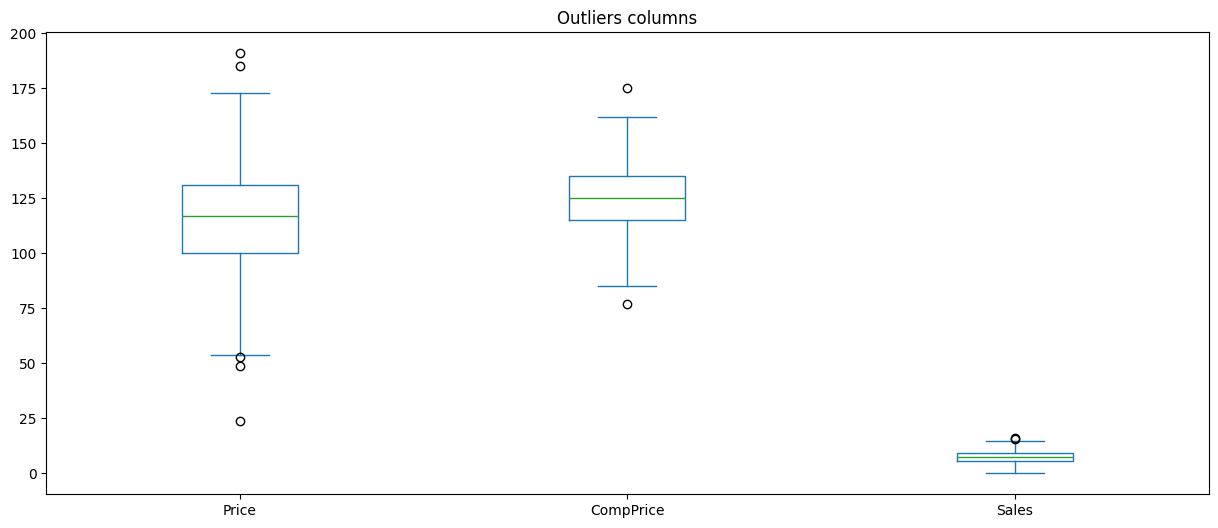

In [ ]:
# outliers 

df[['Price', 'CompPrice', 'Sales']].plot(kind = 'box', figsize = (15, 6))
plt.title("Outliers columns")

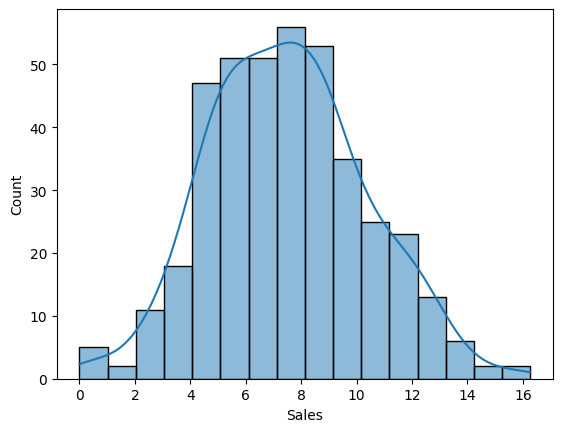

In [23]:
#  scatter plot 

sns.histplot(df['Sales'], kde=True)
plt.show()

In [25]:
df.select_dtypes(exclude = 'object').columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

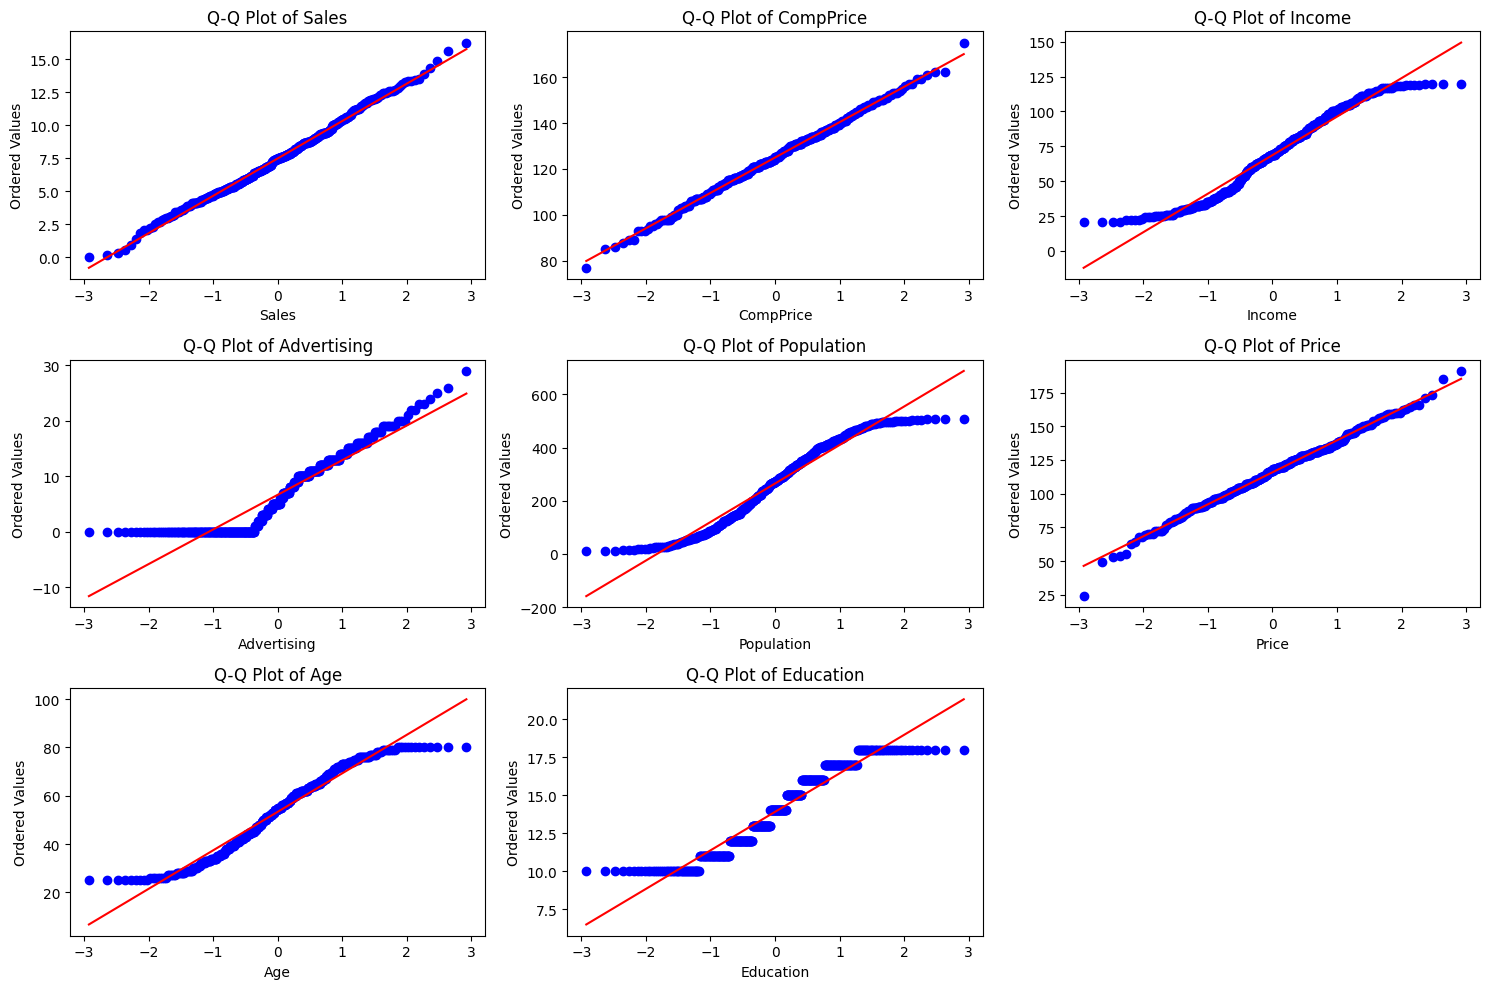

In [28]:
# Select columns for Q-Q plots
columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Create subplots (3 columns per row)
fig, axes = plt.subplots(nrows=(len(columns) // 3) + (len(columns) % 3 > 0), ncols=3, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate Q-Q plots
for i, col in enumerate(columns):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}')
    axes[i].set_xlabel(col)  # Add X-axis label with column name

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
d = 10

In [ ]:
s = 20